# Algoritmo secreto: Gaussian Naive Bayes (GaussianNB) 

## 1.- Descripción

Gaussian Naïve Bayes (GaussianNB) es un clasificador Naïve Bayes, que se utiliza con distribuciones gaussianas (distribuciones normales y variables continuas). Este modelo se ajusta hallando la media y la desviación típica de cada clase.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?utm_source=chatgpt.com 

Antes de comenzar cabe destacar que este modelo solo olo aceptan datos numéricos. Cualquier columna con tipo object o string no puede ser procesada directamente por el modelo. Por ello emplearemos un labelEncoder, ya que  convierte categorías en números enteros.

Lo siguiente que hacemos es separar segun columas numericas y categoricas
Numericas: 
    - Se pueden escalar (con StandardScaler) o transformar (con logaritmos, etc.).
    - GaussianNB modela estas variables con una distribución gaussiana por clase, así que hay que cuidar su forma.

Categóricas:
    - No tienen relación de magnitud → solo se pueden codificar. Emplearemos LabelEncoding en vez de One-hot encoding ya que en modelos como Naive Bayes, SVM o k-NN, puede ser contraproducente debido a: 1)aumenta el número de columnas (sparse matrix) y 2) introduce dependencias entre variables que rompen la independencia que asume GaussianNB.

Si la variable solo tiene 2 valores, es mejor usar LabelEncoder.

## 2.- Implementación


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv("train_limpio.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22835 entries, 0 to 22834
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22835 non-null  object 
 1   LoanNr_ChkDgt      22835 non-null  int64  
 2   Name               22834 non-null  object 
 3   City               22834 non-null  object 
 4   State              22835 non-null  object 
 5   Bank               22813 non-null  object 
 6   BankState          22813 non-null  object 
 7   ApprovalDate       22835 non-null  object 
 8   ApprovalFY         22835 non-null  int64  
 9   NoEmp              22835 non-null  int64  
 10  NewExist           22821 non-null  float64
 11  CreateJob          22835 non-null  int64  
 12  RetainedJob        22835 non-null  int64  
 13  FranchiseCode      22835 non-null  int64  
 14  UrbanRural         22835 non-null  int64  
 15  RevLineCr          22743 non-null  object 
 16  LowDoc             227

### 1.- ELIMINACIÓN DE COLUMNAS IRRELEVANTES

LoanNr_ChkDgt e id



In [25]:
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22835 entries, 0 to 22834
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22835 non-null  object 
 1   LoanNr_ChkDgt      22835 non-null  int64  
 2   Name               22834 non-null  object 
 3   City               22834 non-null  object 
 4   State              22835 non-null  object 
 5   Bank               22813 non-null  object 
 6   BankState          22813 non-null  object 
 7   ApprovalDate       22835 non-null  object 
 8   ApprovalFY         22835 non-null  int64  
 9   NoEmp              22835 non-null  int64  
 10  NewExist           22821 non-null  float64
 11  CreateJob          22835 non-null  int64  
 12  RetainedJob        22835 non-null  int64  
 13  FranchiseCode      22835 non-null  int64  
 14  UrbanRural         22835 non-null  int64  
 15  RevLineCr          22743 non-null  object 
 16  LowDoc             227

In [26]:
df = df.drop(columns=['id', 'LoanNr_ChkDgt'], errors='ignore')


### 2.- Transformación logarítmica de variables sesgadas
Mediante análisis visual previo (KDE/histogramas), se identificaron varias variables numéricas con distribuciones fuertemente asimétricas, lo cual viola la suposición de normalidad de GaussianNB. Las variables transformadas fueron:
- NoEmp
- CreateJob
- RetainedJob
- DisbursementGross

Se aplicó la transformación logarítmica segura np.log1p(x), y de esta forma la curva se relaja, hay menos acumulación extrema en el origen, y se distribuye mejor.

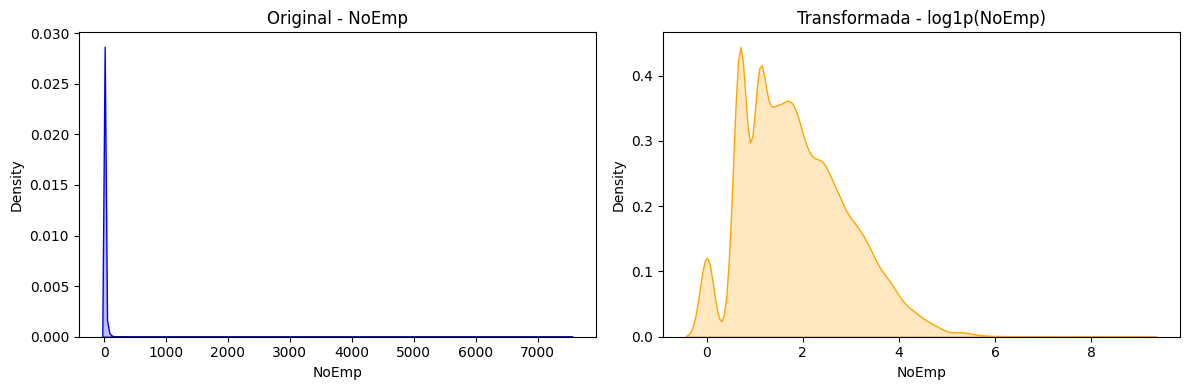

In [33]:
#  DataFrame original
original = df['NoEmp']
transformada = np.log1p(original)

# Graficamos ambas en subplots separados para comparar
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(original, fill=True, color='blue')
plt.title("Original - NoEmp")

plt.subplot(1, 2, 2)
sns.kdeplot(transformada, fill=True, color='orange')
plt.title("Transformada - log1p(NoEmp)")

plt.tight_layout()
plt.show()

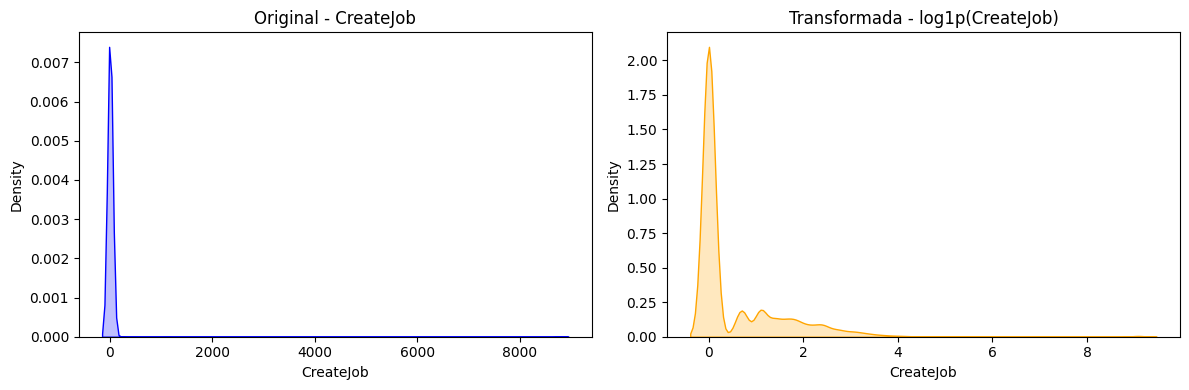

In [32]:
#  DataFrame original
original = df['CreateJob']
transformada = np.log1p(original)

# Graficamos ambas en subplots separados para comparar
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(original, fill=True, color='blue')
plt.title("Original - CreateJob")

plt.subplot(1, 2, 2)
sns.kdeplot(transformada, fill=True, color='orange')
plt.title("Transformada - log1p(CreateJob)")

plt.tight_layout()
plt.show()

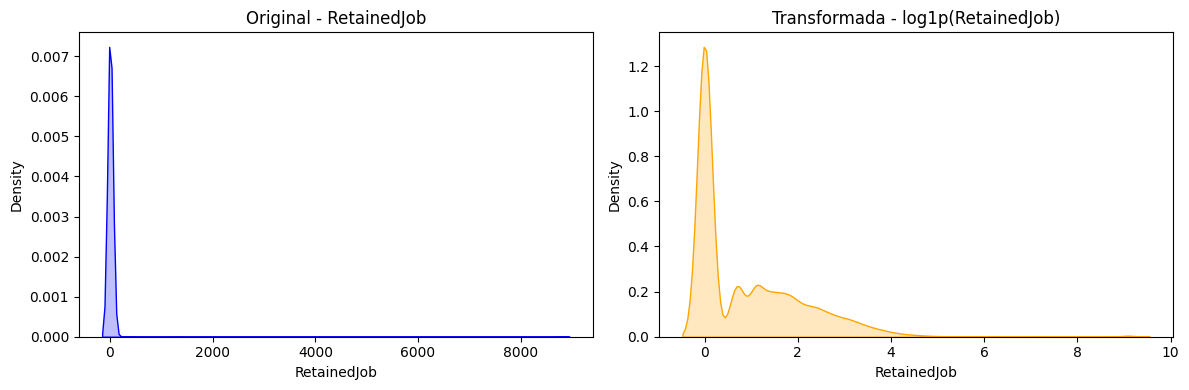

In [31]:
#  DataFrame original
original = df['RetainedJob']
transformada = np.log1p(original)

# Graficamos ambas en subplots separados para comparar
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(original, fill=True, color='blue')
plt.title("Original - RetainedJob")

plt.subplot(1, 2, 2)
sns.kdeplot(transformada, fill=True, color='orange')
plt.title("Transformada - log1p(RetainedJob)")

plt.tight_layout()
plt.show()

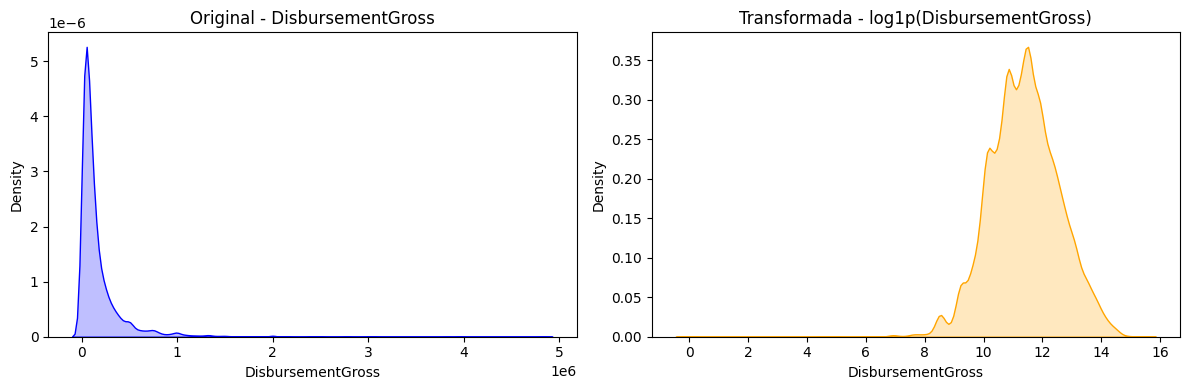

In [ ]:
#  DataFrame original
original = df['DisbursementGross']
transformada = np.log1p(original)

# Graficamos ambas en subplots separados para comparar
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(original, fill=True, color='blue')
plt.title("Original - DisbursementGross")

plt.subplot(1, 2, 2)
sns.kdeplot(transformada, fill=True, color='orange')
plt.title("Transformada - log1p(DisbursementGross)")

plt.tight_layout()
plt.show()


In [37]:
# === TRANSFORMACIÓN LOGARÍTMICA DE VARIABLES SESGADAS ===

log_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']
for col in log_cols:
    df[col] = np.log1p(df[col])

### 3.- CODIFICACIÓN DE VARIABLES CATEGÓRICAS

Prrobamos primero con el labelEncoder como se explico en la descripcion

In [38]:
# === CODIFICACIÓN DE VARIABLES CATEGÓRICAS ===
cat_cols = ['NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'IsFranchise']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Por si necesitas invertir más adelante

### 4.- DEFINICIÓN DE FEATURES Y TARGET


In [39]:
# === DEFINICIÓN DE FEATURES Y TARGET ===
features = log_cols + cat_cols
target = 'Accept'

X = df[features]
y = df[target]


### 5.- DIVISIÓN ENTRENAMIENTO / TEST

In [40]:
# === DIVISIÓN ENTRENAMIENTO / TEST ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Conserva la proporción de clases en ambos conjuntos
)


### 6.- Entrenamiento

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### 6.1.- Sencillo 

In [ ]:
# Modelo
model1 = GaussianNB()
model1.fit(X_train, y_train)

# Evaluación
y_pred1 = model1.predict(X_test)
print(" Modelo 1: Sin escalado ni balanceo")
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

🔹 Modelo 1: Sin escalado ni balanceo
              precision    recall  f1-score   support

           0       0.27      0.17      0.21      1149
           1       0.84      0.91      0.87      5702

    accuracy                           0.78      6851
   macro avg       0.56      0.54      0.54      6851
weighted avg       0.75      0.78      0.76      6851

[[ 198  951]
 [ 529 5173]]


#### 6.2.- Modelo con escalado 

In [ ]:
# Copia y codificación
X = df.copy()
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X = X[num_cols + cat_cols]
y = data['Accept']

# Escalado de variables numéricas
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# División sin balanceo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo
model2 = GaussianNB()
model2.fit(X_train, y_train)

# Evaluación
y_pred2 = model2.predict(X_test)
print(" Modelo 2: Con escalado, sin balanceo")
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

🔹 Modelo 2: Con escalado, sin balanceo
              precision    recall  f1-score   support

           0       0.27      0.17      0.21      1149
           1       0.84      0.91      0.87      5702

    accuracy                           0.78      6851
   macro avg       0.56      0.54      0.54      6851
weighted avg       0.75      0.78      0.76      6851

[[ 198  951]
 [ 529 5173]]


#### 6.3.- Modelo con balanceo 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Copia y codificación
X = df.copy()
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X = X[num_cols + cat_cols]
y = data['Accept']

# Balanceo de clases (sin escalado)
rus = RandomUnderSampler(random_state=42)
X_bal, y_bal = rus.fit_resample(X, y)

# División
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

# Modelo
model3 = GaussianNB()
model3.fit(X_train, y_train)

# Evaluación
y_pred3 = model3.predict(X_test)
print(" Modelo 3: Con balanceo, sin escalado")
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))


🔹 Modelo 3: Con balanceo, sin escalado
              precision    recall  f1-score   support

           0       0.61      0.70      0.66      1150
           1       0.65      0.56      0.60      1149

    accuracy                           0.63      2299
   macro avg       0.63      0.63      0.63      2299
weighted avg       0.63      0.63      0.63      2299

[[810 340]
 [508 641]]


#### 6.4.- Modelo con escalado y balanceo

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

# Copia y codificación
X = data.copy()

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X = X[num_cols + cat_cols]
y = data['Accept']

# Escalado
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Balanceo
rus = RandomUnderSampler(random_state=42)
X_bal, y_bal = rus.fit_resample(X, y)

# División balanceada
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

# Modelo
model4 = GaussianNB()
model4.fit(X_train, y_train)

# Evaluación
y_pred4 = model4.predict(X_test)
print(" Modelo 4: Con escalado y balanceo")
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))


🔹 Modelo 2: Con escalado y balanceo
              precision    recall  f1-score   support

           0       0.53      0.95      0.68      1150
           1       0.73      0.15      0.25      1149

    accuracy                           0.55      2299
   macro avg       0.63      0.55      0.46      2299
weighted avg       0.63      0.55      0.46      2299

[[1087   63]
 [ 978  171]]


#### 6.5.- Modelo con escalado, balanceo y ajuste de umbral

🔹 Modelo 5: Ajuste de umbral para optimizar recall clase 1

Umbral = 0.5 → Recall: 0.149 | Precisión: 0.731 | F1: 0.247
Umbral = 0.4 → Recall: 0.172 | Precisión: 0.750 | F1: 0.280
Umbral = 0.3 → Recall: 0.278 | Precisión: 0.740 | F1: 0.404
Umbral = 0.2 → Recall: 0.312 | Precisión: 0.696 | F1: 0.431
Umbral = 0.1 → Recall: 0.459 | Precisión: 0.659 | F1: 0.541

✅ Mejor umbral: 0.10 con Recall: 0.459


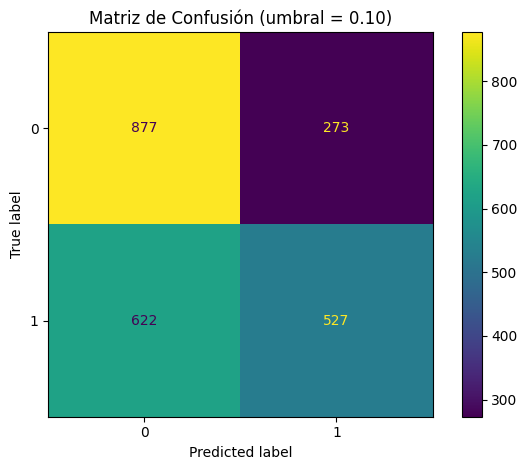

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Reutilizamos X_bal, y_bal ya escalados y balanceados del modelo anterior

# División
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

# Modelo
model5 = GaussianNB()
model5.fit(X_train, y_train)

# Predict proba
y_proba = model5.predict_proba(X_test)[:, 1]

# Evaluación por umbrales
print(" Modelo 5: Ajuste de umbral para optimizar recall clase 1\n")
mejor = {'threshold': None, 'recall': 0, 'precision': 0, 'f1': 0}

for t in [0.5, 0.4, 0.3, 0.2, 0.1]:
    y_pred = (y_proba >= t).astype(int)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Umbral = {t:.1f} → Recall: {recall:.3f} | Precisión: {precision:.3f} | F1: {f1:.3f}")
    
    if recall > mejor['recall']:
        mejor.update({'threshold': t, 'recall': recall, 'precision': precision, 'f1': f1})

# Matriz de confusión del mejor umbral
print(f"\n Mejor umbral: {mejor['threshold']:.2f} con Recall: {mejor['recall']:.3f}")
y_pred_final = (y_proba >= mejor['threshold']).astype(int)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final)
plt.title(f"Matriz de Confusión (umbral = {mejor['threshold']:.2f})")
plt.tight_layout()
plt.show()


#### 6.6.- Ajuste de priors + var_smoothing + ajuste de umbral

🔹 Modelo 6: Ajuste de priors + var_smoothing + ajuste de umbral

Umbral = 0.5 → Recall 0: 0.945 | Recall 1: 0.149 | F1: 0.247
Umbral = 0.4 → Recall 0: 0.943 | Recall 1: 0.172 | F1: 0.280
Umbral = 0.3 → Recall 0: 0.903 | Recall 1: 0.278 | F1: 0.404
Umbral = 0.2 → Recall 0: 0.864 | Recall 1: 0.312 | F1: 0.431
Umbral = 0.1 → Recall 0: 0.763 | Recall 1: 0.459 | F1: 0.541

✅ Mejor umbral: 0.10 → Recall 0: 0.763, Recall 1: 0.459, F1: 0.541


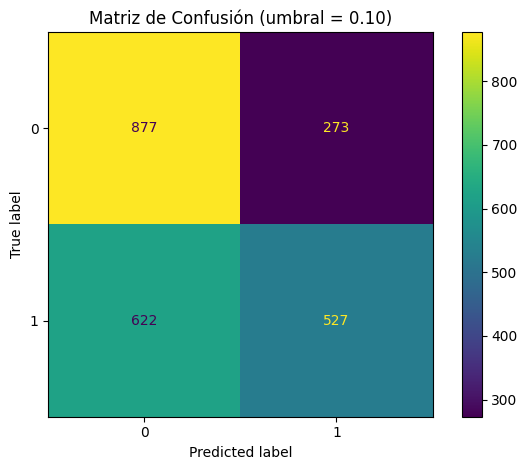

In [ ]:
X = data.copy()

# Codificación de categóricas
cat_cols = ['NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'IsFranchise']
num_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X = X[num_cols + cat_cols]
y = data['Accept']

# Escalado
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Balanceo
rus = RandomUnderSampler(random_state=42)
X_bal, y_bal = rus.fit_resample(X, y)

# División
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

# === 2. Modelo con priors y var_smoothing ===
model6 = GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-8)
model6.fit(X_train, y_train)

# === 3. Predicción con probabilidades ===
y_proba = model6.predict_proba(X_test)[:, 1]

# === 4. Evaluación por umbrales ===
print(" Modelo 6: Ajuste de priors + var_smoothing + ajuste de umbral\n")

mejor = {'threshold': None, 'recall_0': 0, 'recall_1': 0, 'f1': 0}

for t in [0.5, 0.4, 0.3, 0.2, 0.1]:
    y_pred = (y_proba >= t).astype(int)

    # Recall por clase
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred)

    print(f"Umbral = {t:.1f} → Recall 0: {recall_0:.3f} | Recall 1: {recall_1:.3f} | F1: {f1:.3f}")

    if recall_0 + recall_1 > mejor['recall_0'] + mejor['recall_1']:
        mejor.update({'threshold': t, 'recall_0': recall_0, 'recall_1': recall_1, 'f1': f1})

# === 5. Matriz de confusión final ===
print(f"\n Mejor umbral: {mejor['threshold']:.2f} → Recall 0: {mejor['recall_0']:.3f}, Recall 1: {mejor['recall_1']:.3f}, F1: {mejor['f1']:.3f}")
y_pred_final = (y_proba >= mejor['threshold']).astype(int)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final)
plt.title(f"Matriz de Confusión (umbral = {mejor['threshold']:.2f})")
plt.tight_layout()
plt.show()

#### 6.7: Ajuste fino de var_smoothing 

 Modelo 7: Ajuste fino de var_smoothing (umbral fijo 0.1)

var_smoothing = 1e-09 → Recall 0: 0.763, Recall 1: 0.459, F1: 0.541
var_smoothing = 1e-08 → Recall 0: 0.763, Recall 1: 0.459, F1: 0.541
var_smoothing = 1e-07 → Recall 0: 0.763, Recall 1: 0.459, F1: 0.541
var_smoothing = 1e-06 → Recall 0: 0.763, Recall 1: 0.459, F1: 0.541
var_smoothing = 1e-05 → Recall 0: 0.763, Recall 1: 0.459, F1: 0.541

 Mejor var_smoothing: 1e-09
→ Recall 0: 0.763 | Recall 1: 0.459 | F1: 0.541


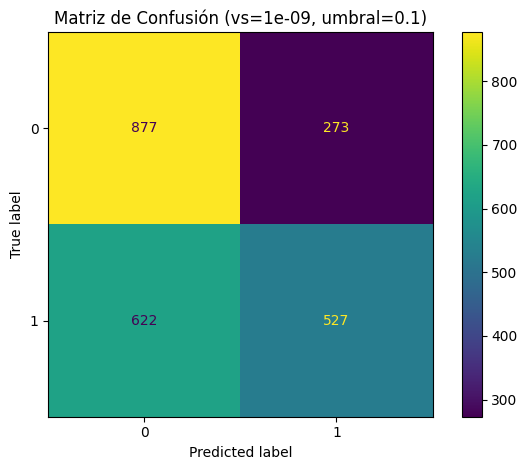

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, precision_score, f1_score, ConfusionMatrixDisplay

# === Entrenamiento base: datos escalados y balanceados ===
# Se reutiliza X_bal, y_bal ya preprocesados
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

# === Probar distintos valores de var_smoothing ===
smoothing_vals = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
mejor_modelo = {'vs': None, 'recall_0': 0, 'recall_1': 0, 'f1': 0}

print(" Modelo 7: Ajuste fino de var_smoothing (umbral fijo 0.1)\n")
for vs in smoothing_vals:
    model = GaussianNB(var_smoothing=vs, priors=[0.5, 0.5])
    model.fit(X_train, y_train)
    
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= 0.1).astype(int)

    r0 = recall_score(y_test, y_pred, pos_label=0)
    r1 = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred)

    print(f"var_smoothing = {vs:.0e} → Recall 0: {r0:.3f}, Recall 1: {r1:.3f}, F1: {f1:.3f}")

    if r0 + r1 > mejor_modelo['recall_0'] + mejor_modelo['recall_1']:
        mejor_modelo.update({'vs': vs, 'recall_0': r0, 'recall_1': r1, 'f1': f1})

# === Mostrar el mejor modelo ===
print(f"\n Mejor var_smoothing: {mejor_modelo['vs']:.0e}")
print(f"→ Recall 0: {mejor_modelo['recall_0']:.3f} | Recall 1: {mejor_modelo['recall_1']:.3f} | F1: {mejor_modelo['f1']:.3f}")

# Entrenamiento y matriz de confusión final con mejor var_smoothing
modelo_final = GaussianNB(var_smoothing=mejor_modelo['vs'], priors=[0.5, 0.5])
modelo_final.fit(X_train, y_train)
y_pred_final = (modelo_final.predict_proba(X_test)[:, 1] >= 0.1).astype(int)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final)
plt.title(f"Matriz de Confusión (vs={mejor_modelo['vs']:.0e}, umbral=0.1)")
plt.tight_layout()
plt.show()


#### 6.8 – GaussianNB con priors=[0.4, 0.6]

🔹 Modelo 8: Ajuste de priors [0.4, 0.6] + ajuste de umbral

Umbral = 0.5 → Recall 0: 0.943, Recall 1: 0.172, F1: 0.280
Umbral = 0.4 → Recall 0: 0.903, Recall 1: 0.275, F1: 0.401
Umbral = 0.3 → Recall 0: 0.870, Recall 1: 0.303, F1: 0.423
Umbral = 0.2 → Recall 0: 0.832, Recall 1: 0.362, F1: 0.473
Umbral = 0.1 → Recall 0: 0.722, Recall 1: 0.539, F1: 0.593

✅ Mejor umbral: 0.10
→ Recall 0: 0.722 | Recall 1: 0.539 | F1: 0.593


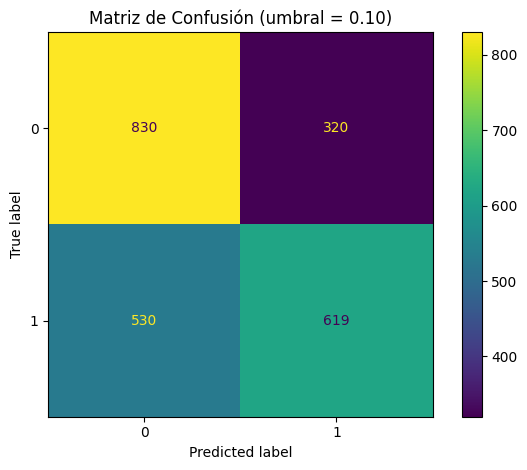

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, precision_score, f1_score, ConfusionMatrixDisplay

# === División ya escalada y balanceada ===
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

# === Modelo con priors favoreciendo la clase 1 ===
model8 = GaussianNB(var_smoothing=1e-9, priors=[0.4, 0.6])
model8.fit(X_train, y_train)

# === Evaluación por umbrales ===
print(" Modelo 8: Ajuste de priors [0.4, 0.6] + ajuste de umbral\n")
mejor = {'threshold': None, 'recall_0': 0, 'recall_1': 0, 'f1': 0}
y_proba = model8.predict_proba(X_test)[:, 1]

for t in [0.5, 0.4, 0.3, 0.2, 0.1]:
    y_pred = (y_proba >= t).astype(int)
    r0 = recall_score(y_test, y_pred, pos_label=0)
    r1 = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred)
    print(f"Umbral = {t:.1f} → Recall 0: {r0:.3f}, Recall 1: {r1:.3f}, F1: {f1:.3f}")

    if r0 + r1 > mejor['recall_0'] + mejor['recall_1']:
        mejor.update({'threshold': t, 'recall_0': r0, 'recall_1': r1, 'f1': f1})

# === Resultado final ===
print(f"\n Mejor umbral: {mejor['threshold']:.2f}")
print(f"→ Recall 0: {mejor['recall_0']:.3f} | Recall 1: {mejor['recall_1']:.3f} | F1: {mejor['f1']:.3f}")

# Matriz de confusión final
y_pred_final = (y_proba >= mejor['threshold']).astype(int)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final)
plt.title(f"Matriz de Confusión (umbral = {mejor['threshold']:.2f})")
plt.tight_layout()
plt.show()


### Conclusiones

Modelo 2: El modelo tiene exactamente los mismos resultados que el modelo 1 por lo que el escalado no aporta nada si no corriges el desequilibrio de clases.

Modelo 3: Buen equilibrio, mejora en clase 0 sin perder clase 1

Modelo 4: El balanceo invirtió el sesgo, pero ahora el modelo predice casi todo como clase 0. No es útil si te interesa detectar aprobados.

Modelo 5: Este es el mejor modelo de todos. Ajustar el umbral permitió recuperar muchos positivos reales sin perder del todo la precisión.

Modelo 6: Aunque pierde algo de recall en la clase 1 comparado con el Modelo 1 puro (que daba 0.91 pero prediciendo todo como 1), ahora sí predice ambas clases razonablemente bien. El F1-score ha mejorado notablemente (0.541), y refleja que ya no está totalmente sesgado. El uso de priors=[0.5, 0.5] y var_smoothing=1e-8 ha tenido efecto real en balancear el modelo.

Modelo 7: Confirma que el valor de var_smoothing no está afectando significativamente el rendimiento, al menos sobre los datos ya balanceados y escalados.

Modelo 8: El F1-score es el más alto de todos los modelos hasta ahora. La prior suavemente inclinada hacia la clase 1 ha permitido capturar más verdaderos positivos sin disparar los falsos positivos.



## 3.- Evaluación y optimización


## 4.- Conclusión